# SENSE 2019 Part I : Data Collection - REE API

The objective of this session is to understand how data can be retrieved from specific sources as REE API.

To do so, we will use `requests` library and `json` libraries for Python. These libraries are considered as wrappers. 

Later on, we will use specific libraries for plotting as `matplotlib` and `datetime`. 

In [1]:
# import requests library
import requests 
import json
# import plotting library
import matplotlib
import matplotlib.pyplot as plt 
import datetime


As we have seen before, when we work with APIs, we have to write the endpoint we want to access. 
We need to write also the folder/section we want to access. We can have the same endpoint and different sections from where to get information. 

Most of the times, we need to add some headers to our requests that are required to get the information. The most important one is the **Authorization**, which corresponds to our ID to access that API. 

In [2]:
endpoint = 'https://api.esios.ree.es'
get_archives = '/archives_json'
headers = {'Accept': 'application/json',
           'Host': 'api.esios.ree.es',
           'Authorization': 'Token token=\"698029efc153688eadd309f7fb51ec801bf8a2bac2ea841e8c439843d11264f9"'
          }
params = {'date': '20191012'}
 

Then, we can write the request according to the requests library and get callable object.

In [3]:
request = requests.get(endpoint+get_archives, headers=headers, params=params)

After that, we can check if the request is correct or not according to the response we get from the API. 

In [4]:
request

<Response [200]>

In this case, the response we get is **200**, meaning that is has been accepted and the connection is established. 
There are different codes that tell us which is our connection status between us and the API. 

In [5]:
status = request.status_code

In [6]:
#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


The data can be accessed by means of a json file. By doing this, we can see all the IDs available for us to obtain data. 

In [7]:
# accessing data by means of a json object
data = request.json()

In [8]:
data

{'archives': [{'id': 140,
   'name': 'IND_EnergiaAnual',
   'description': 'IND_EnergiaAnual',
   'horizon': 'A',
   'archive_type': 'json',
   'json_download': {'name': 'IND_EnergiaAnual',
    'type': 'JSON',
    'url': '/archives/140/download_json?locale=es'},
   'taxonomy_terms': [],
   'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'},
    {'id_vocabulary': 21, 'name': 'Temática'},
    {'id_vocabulary': 22, 'name': 'Área'}]},
  {'id': 139,
   'name': 'IND_EnergiaMensual',
   'description': 'IND_EnergiaMensual',
   'horizon': 'M',
   'archive_type': 'json',
   'json_download': {'name': 'IND_EnergiaMensual',
    'type': 'JSON',
    'url': '/archives/139/download_json?locale=es'},
   'taxonomy_terms': [],
   'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'},
    {'id_vocabulary': 21, 'name': 'Temática'},
    {'id_vocabulary': 22, 'name': 'Área'}]},
  {'id': 117,
   'name': 'IND_MaxMinRenovEol',
   'description': 'IND_MaxMinRenovEol',
   'horizon': 'D',
   'archive_ty

As we can see from the script below, we can see different IDs that are related to different types of information. For example: 

- ID:140 → means the Annual Energy consumed by resource type. 
- ID:139 → means the Monthly Energy consumed by resource type. 
- ID:66  → PRECIO FINAL: means the final PVPC price for the day after that the end-user is going to pay for his/her energy consumption
- ID:64 → Installed capacity in Spain, per resource. 

In our case, today we would like to check ID 66, analysing the final PVPC prices for different days and timeperiods. 

In [9]:
get_json = '/archives/66/download_json?locale=es'

In [10]:
request = requests.get(endpoint+get_json, headers=headers, params = params)

In [11]:
request.json()

{'PrecioFinal': [{'Dia': '12/10/2019',
   'Hora': '00-01',
   'GEN': '108,17',
   'NOC': '59,72',
   'VHC': '63,06',
   'COF': '0,000086976382000000',
   'BOEGEN': '52,43',
   'BOENOC': '5,93',
   'BOEVHC': '7,08',
   'PMHGEN': '54,83',
   'PMHNOC': '52,91',
   'PMHVHC': '55,06',
   'SAHGEN': '0,91',
   'SAHNOC': '0,88',
   'SAHVHC': '0,92'},
  {'Dia': '12/10/2019',
   'Hora': '01-02',
   'GEN': '106,13',
   'NOC': '57,64',
   'VHC': '54,81',
   'COF': '0,000072986921000000',
   'BOEGEN': '52,46',
   'BOENOC': '5,92',
   'BOEVHC': '4,32',
   'PMHGEN': '52,56',
   'PMHNOC': '50,65',
   'PMHVHC': '49,45',
   'SAHGEN': '1,11',
   'SAHNOC': '1,07',
   'SAHVHC': '1,05'},
  {'Dia': '12/10/2019',
   'Hora': '02-03',
   'GEN': '102,21',
   'NOC': '53,81',
   'VHC': '51,08',
   'COF': '0,000064728068000000',
   'BOEGEN': '52,42',
   'BOENOC': '5,87',
   'BOEVHC': '4,27',
   'PMHGEN': '48,50',
   'PMHNOC': '46,70',
   'PMHVHC': '45,60',
   'SAHGEN': '1,29',
   'SAHNOC': '1,24',
   'SAHVHC': '1,2

In [12]:
request.json()['PrecioFinal'][1]

{'Dia': '12/10/2019',
 'Hora': '01-02',
 'GEN': '106,13',
 'NOC': '57,64',
 'VHC': '54,81',
 'COF': '0,000072986921000000',
 'BOEGEN': '52,46',
 'BOENOC': '5,92',
 'BOEVHC': '4,32',
 'PMHGEN': '52,56',
 'PMHNOC': '50,65',
 'PMHVHC': '49,45',
 'SAHGEN': '1,11',
 'SAHNOC': '1,07',
 'SAHVHC': '1,05'}

In [13]:
prices = []

In [14]:
for time_period in request.json()['PrecioFinal']:
    prices.append(float(time_period['VHC'].replace(',','.')))
    print(f"Price at {time_period['Hora']} is {time_period['VHC']} €/MWh")

Price at 00-01 is 63,06 €/MWh
Price at 01-02 is 54,81 €/MWh
Price at 02-03 is 51,08 €/MWh
Price at 03-04 is 48,63 €/MWh
Price at 04-05 is 48,30 €/MWh
Price at 05-06 is 47,52 €/MWh
Price at 06-07 is 47,07 €/MWh
Price at 07-08 is 54,25 €/MWh
Price at 08-09 is 54,43 €/MWh
Price at 09-10 is 59,26 €/MWh
Price at 10-11 is 62,49 €/MWh
Price at 11-12 is 56,61 €/MWh
Price at 12-13 is 54,53 €/MWh
Price at 13-14 is 116,70 €/MWh
Price at 14-15 is 115,17 €/MWh
Price at 15-16 is 109,08 €/MWh
Price at 16-17 is 109,17 €/MWh
Price at 17-18 is 110,10 €/MWh
Price at 18-19 is 115,81 €/MWh
Price at 19-20 is 125,48 €/MWh
Price at 20-21 is 127,16 €/MWh
Price at 21-22 is 127,50 €/MWh
Price at 22-23 is 119,42 €/MWh
Price at 23-24 is 54,05 €/MWh


### Final PVPC price

In [15]:
prices

[63.06,
 54.81,
 51.08,
 48.63,
 48.3,
 47.52,
 47.07,
 54.25,
 54.43,
 59.26,
 62.49,
 56.61,
 54.53,
 116.7,
 115.17,
 109.08,
 109.17,
 110.1,
 115.81,
 125.48,
 127.16,
 127.5,
 119.42,
 54.05]

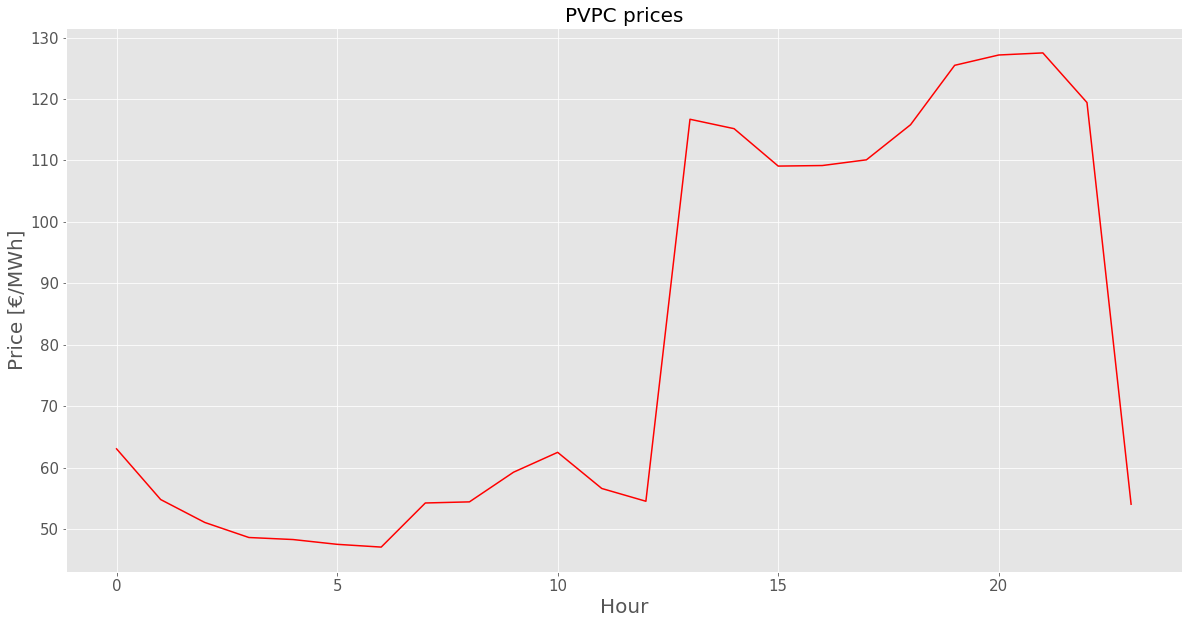

In [41]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(prices,'r',linewidth=1.5)
plt.title(f"PVPC prices", fontsize=20)
plt.xlabel('Hour',fontsize=20 )
plt.ylabel('Price [€/MWh]',fontsize=20)
plt.show()

## Day-Ahead Market Clearing Price 

In [28]:
date_today = datetime.date.today()                # use todays prices
date = date_today + datetime.timedelta(days=2)    # open to use tomorrows prices
#dateend = datetime.date.today()            # use to specify a date
dateend = date                              # to use only one day

### Tomorrows prices can only be requested after 20:15 the day before. ###

startdate = str(date_today) + "T00:00:00.00" # can specify more if desired
enddate = str(dateend) + "T23:50:00.00"
indicator = str(600)    # market clearing (DAM) price. Imbalance is 687

# You can get it by putting the mouse over the indicator name on the webpage. 
# webpage: https://www.esios.ree.es/es/analisis/600
website = 'https://api.esios.ree.es/indicators/'+indicator+'?start_date='+startdate+'&end_date='+enddate
     
     
print('Checking dates: ' , startdate , "to" , enddate) # printing the date 

URL = website # host website
GET = '/archives_json' # API link
HEADERS = {
            'Accept': "application/json; application/vnd.esios-api-v1+json",
            'Host': 'api.esios.ree.es',
            'Authorization': "Token token=\"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81",#"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81"',
            'Content-Type': 'application/json'}
#PARAMS = {'date':date}

# Runs the request to get the total URL with access token
response = requests.get(url = URL+GET, headers = HEADERS)#, params = PARAMS)

# Read the status code
status = response.status_code  



Checking dates:  2019-10-13T00:00:00.00 to 2019-10-15T23:50:00.00




List of market prices for day 2019-10-15 in €/MWh:
[35.86, 34.1, 32.5, 31.0, 30.0, 31.99, 32.5, 33.6, 33.75, 35.25, 35.55, 35.45, 35.25, 35.25, 34.9, 33.7, 33.7, 35.0, 36.8, 49.08, 56.01, 56.41, 53.52, 50.09, 41.01, 35.55, 34.45, 33.57, 32.58, 32.07, 36.06, 48.92, 50.24, 50.39, 49.58, 48.0, 45.25, 43.0, 39.5, 40.8, 39.99, 41.49, 47.5, 52.19, 50.44, 50.09, 39.96, 35.55]


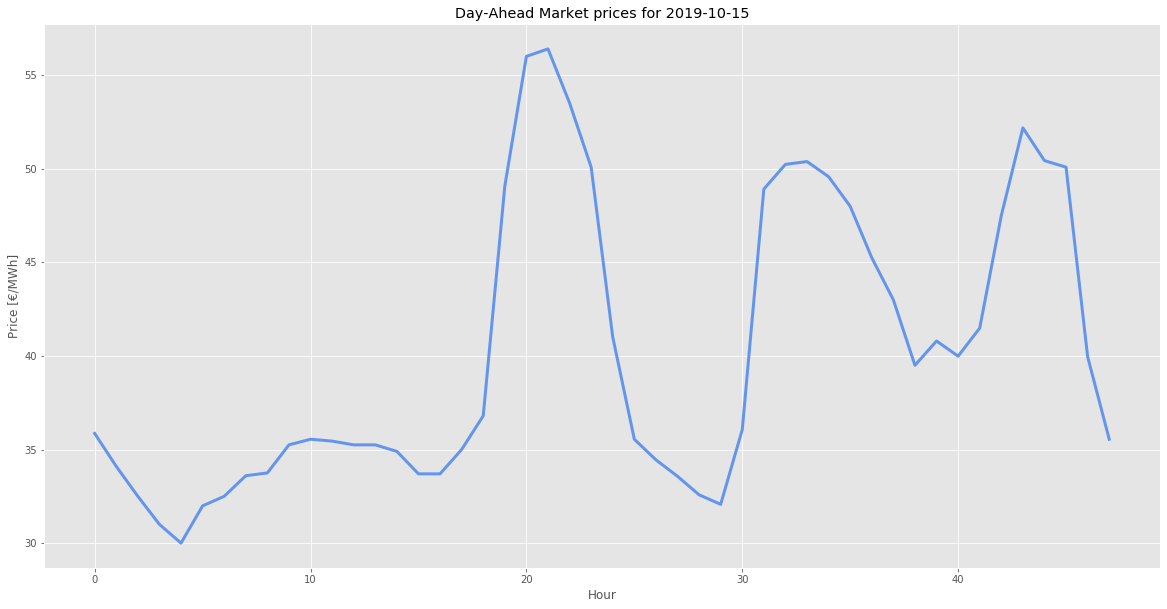

In [29]:
# Diving into the data:
marketlist = []
for stuff in response.json()["indicator"]['values']:
    #print(stuff) ## show more stuff that can be gathered
    if stuff['geo_id'] == 3: ## choose Espana. 1 = Portugal, 2 = Francia
    #print(stuff['value'])
        marketlist.append(stuff['value'])

        
print('\n')
print(f"List of market prices for day {date} in €/MWh:")        
print(marketlist)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(marketlist,'r',linewidth=3, color='cornflowerblue')
plt.title(f"Day-Ahead Market prices for {date}")
plt.xlabel('Hour')
plt.ylabel('Price [€/MWh]')
plt.show()

In [32]:
len(marketlist)

48